In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d vijaykumar1799/face-mask-detection

 99% 220M/222M [00:12<00:00, 22.0MB/s]
100% 222M/222M [00:12<00:00, 18.6MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-detection.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

Dataset  face-mask-detection.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [ ]:
import os #access the files in folders
import numpy as np #to convert the images into the numpy arrays
import matplotlib.pyplot as plt#visualization
import matplotlib.image as mpimg#visualization
import cv2#image processing
from google.colab.patches import cv2_imshow#imshow function in cv2 lib not in colab
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/Dataset/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['2349.png', '1311.png', '1172.png', '850.png', '2183.png']
['396.png', '826.png', '2250.png', '732.png', '1399.png']


In [ ]:
without_mask_files = os.listdir('/content/Dataset/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['2349.png', '1311.png', '1172.png', '850.png', '2183.png']
['396.png', '826.png', '2250.png', '732.png', '1399.png']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 2994
Number of without mask images: 2994


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*2994

without_mask_labels = [0]*2994

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

2994
2994


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

5988
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

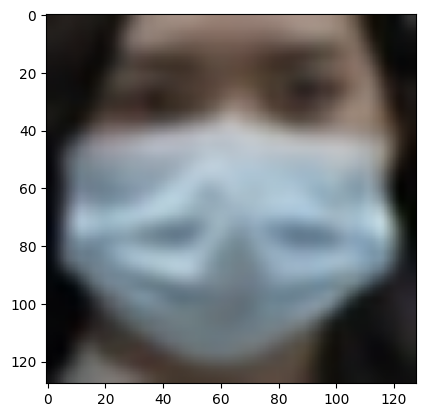

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/Dataset/with_mask/1867.png')
imgplot = plt.imshow(img)
plt.show()

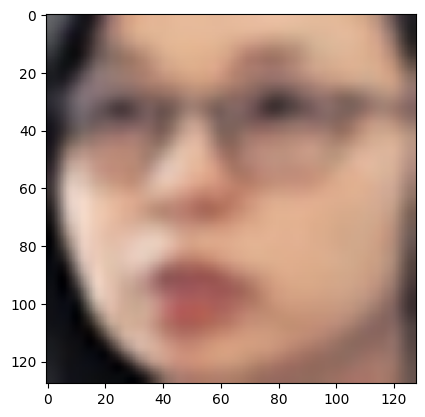

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/Dataset/without_mask/2699.png')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/Dataset/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/Dataset/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

5988

In [ ]:
data[0]

array([[[146,  53,  41],
        [107,  30,  20],
        [105,  29,  17],
        ...,
        [ 15,  15,  13],
        [ 16,  16,  15],
        [ 16,  16,  15]],

       [[138,  48,  37],
        [104,  27,  15],
        [ 99,  24,  15],
        ...,
        [ 15,  15,  13],
        [ 16,  16,  15],
        [ 16,  16,  15]],

       [[128,  41,  30],
        [102,  22,  14],
        [ 91,  19,   8],
        ...,
        [ 15,  15,  13],
        [ 16,  16,  15],
        [ 16,  16,  15]],

       ...,

       [[110,  68,  58],
        [ 82,  52,  47],
        [ 84,  54,  48],
        ...,
        [ 71,  30,   9],
        [ 71,  30,   9],
        [ 73,  30,   9]],

       [[ 58,  23,  13],
        [ 42,  18,  12],
        [ 49,  22,  16],
        ...,
        [ 71,  31,  11],
        [ 73,  30,   9],
        [ 73,  31,  10]],

       [[ 46,  15,   5],
        [ 36,  14,   8],
        [ 38,  14,   8],
        ...,
        [ 72,  31,  11],
        [ 73,  31,  11],
        [ 73,  31,  11]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(5988, 128, 128, 3)
(5988,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(5988, 128, 128, 3) (4790, 128, 128, 3) (1198, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[  9,   7,  10],
        [ 10,   7,   9],
        [ 14,   8,   9],
        ...,
        [ 18,  10,   8],
        [ 18,  10,   8],
        [ 18,  10,   8]],

       [[ 11,  10,  13],
        [ 13,  10,  12],
        [ 16,  10,  11],
        ...,
        [ 19,  11,   9],
        [ 19,  11,   9],
        [ 19,  11,   9]],

       [[ 14,  12,  15],
        [ 14,  12,  13],
        [ 17,  11,  11],
        ...,
        [ 19,  11,   9],
        [ 20,  11,   9],
        [ 20,  11,   9]],

       ...,

       [[119, 117, 107],
        [ 56,  50,  40],
        [ 11,   1,   0],
        ...,
        [ 22,  11,  10],
        [ 21,  10,   9],
        [ 21,  10,  10]],

       [[209, 209, 195],
        [139, 134, 120],
        [ 84,  75,  61],
        ...,
        [ 20,   9,   9],
        [ 19,   6,   6],
        [ 19,   7,   7]],

       [[212, 214, 198],
        [202, 199, 183],
        [206, 199, 182],
        ...,
        [ 20,   8,   8],
        [ 17,   5,   5],
        [ 18,   6,   6]]

In [ ]:
X_train_scaled[0]

array([[[0.03529412, 0.02745098, 0.03921569],
        [0.03921569, 0.02745098, 0.03529412],
        [0.05490196, 0.03137255, 0.03529412],
        ...,
        [0.07058824, 0.03921569, 0.03137255],
        [0.07058824, 0.03921569, 0.03137255],
        [0.07058824, 0.03921569, 0.03137255]],

       [[0.04313725, 0.03921569, 0.05098039],
        [0.05098039, 0.03921569, 0.04705882],
        [0.0627451 , 0.03921569, 0.04313725],
        ...,
        [0.0745098 , 0.04313725, 0.03529412],
        [0.0745098 , 0.04313725, 0.03529412],
        [0.0745098 , 0.04313725, 0.03529412]],

       [[0.05490196, 0.04705882, 0.05882353],
        [0.05490196, 0.04705882, 0.05098039],
        [0.06666667, 0.04313725, 0.04313725],
        ...,
        [0.0745098 , 0.04313725, 0.03529412],
        [0.07843137, 0.04313725, 0.03529412],
        [0.07843137, 0.04313725, 0.03529412]],

       ...,

       [[0.46666667, 0.45882353, 0.41960784],
        [0.21960784, 0.19607843, 0.15686275],
        [0.04313725, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf#pytorch
from tensorflow import keras#wrapper

In [ ]:
num_of_classes = 2

model = keras.Sequential()
#filters= no of output channels
#kernel--size of con filter
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())#1d

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))#overfit

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
135/135 [==============================] - 20s 43ms/step - loss: 0.3354 - acc: 0.8766 - val_loss: 0.0956 - val_acc: 0.9666
Epoch 2/5
135/135 [==============================] - 2s 18ms/step - loss: 0.1351 - acc: 0.9615 - val_loss: 0.0587 - val_acc: 0.9791
Epoch 3/5
135/135 [==============================] - 2s 17ms/step - loss: 0.1008 - acc: 0.9710 - val_loss: 0.0512 - val_acc: 0.9812
Epoch 4/5
135/135 [==============================] - 2s 18ms/step - loss: 0.0887 - acc: 0.9743 - val_loss: 0.0583 - val_acc: 0.9875
Epoch 5/5
135/135 [==============================] - 2s 17ms/step - loss: 0.0722 - acc: 0.9784 - val_loss: 0.0377 - val_acc: 0.9875


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

38/38 [==============================] - 0s 11ms/step - loss: 0.0672 - acc: 0.9758
Test Accuracy = 0.9757930040359497


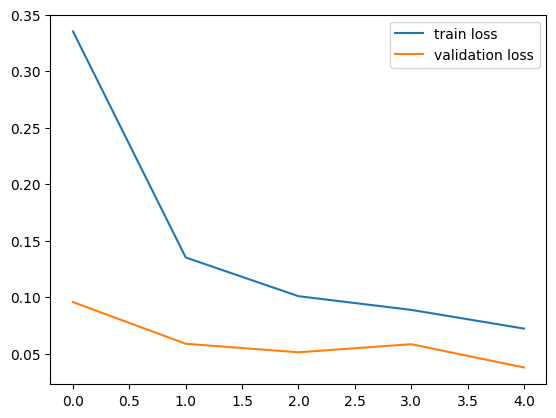

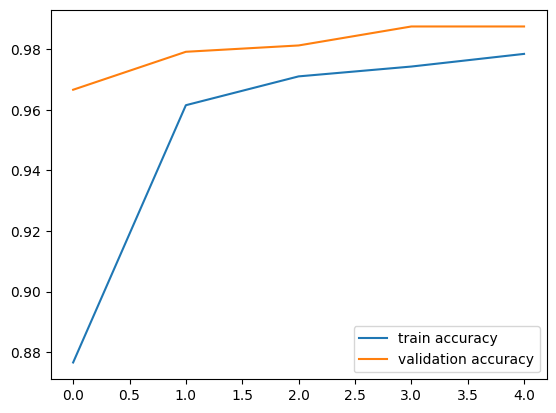

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [ ]:
img_path = input('Path of the image to be predicted: ')
img = Image.open(img_path)
img = img.resize((128,128))
img_array = np.array(img)
img_array = img_array.astype('float32') / 255
img_array = np.expand_dims(img_array, axis=0)

# Predict the class of the image
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

class_names = [
    0,1
]

predicted_class_name = class_names[predicted_class]
print("Predicted class:", predicted_class_name)
if predicted_class_name==0:
  print("The person is not wearing is mask")
else:
  print("The person is wearing a mask")
input_image = cv2.imread(img_path)

cv2_imshow(input_image)

KeyboardInterrupt: ignored

In [ ]:
model.save("facemask")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [ ]:
# !pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 9.0 MB/s eta 0

In [ ]:
# import gradio as gr

In [ ]:
# class_names = [
#     "the person is not wearing mask","the person is wearing mask"
# ]

In [ ]:
# def predict_image(img):
#   img_2d = img.reshape(-1,128,128,3)
#   prediction = model.predict(img_2d)[0]
#   return{class_names[i]:float(prediction[i]) for i in range(2)}


In [ ]:
# image = gr.inputs.Image(shape= (128,128))
# label = gr.outputs.Label(num_top_classes = 2)
# gr.Interface(fn = predict_image,inputs = image,outputs = label,capture_session = True).launch(debug='True')

<ipython-input-49-fd2d7a2c540a>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape= (128,128))
<ipython-input-49-fd2d7a2c540a>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape= (128,128))
<ipython-input-49-fd2d7a2c540a>:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes = 2)
<ipython-input-49-fd2d7a2c540a>:2: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes = 2)
<ipython-input-49-fd2d7a2c540a>:3: GradioDeprecationWarning: `capture_session` parameter is deprecated, and it has no effect
  gr.Interface(fn = predict_image,inputs = ima

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://c5647cf067e8141d70.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 175ms/step


/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(


1/1 [==============================] - 0s 26ms/step


/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(


1/1 [==============================] - 0s 28ms/step


/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://c5647cf067e8141d70.gradio.live
